<a href="https://colab.research.google.com/github/Samuosti/CV-SITE/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**News Scraping**

In [93]:
# Install libraries
!pip install GoogleNews
!pip install newspaper3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
# Import libraries
# GoogleNews Documentation : https://pypi.org/project/GoogleNews/
from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
from tqdm import tqdm
import pandas as pd
import nltk  # NLP library

In [95]:
# This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
# Config to avoid 403 forbidden error
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
config = Config()
config.browser_user_agent = user_agent
config.request_timeout = 20

In [97]:
# Initializing
googlenews = GoogleNews()


In [98]:
# Clear previous search
googlenews.clear()

In [99]:
# Settings
googlenews = GoogleNews(lang='en',start='01/06/2023',end='01/06/2023')

In [100]:
# Search 
googlenews.search('Italy')
print(f"Articles found:", googlenews.total_count())

Articles found: 50300


In [101]:
# Results
result = googlenews.result()

In [102]:
# Convert to DataFrame
df = pd.DataFrame(result)
df.head(20)

,title,media,date,datetime,desc,link,img
0,Former star Italy striker Vialli dies aged 58,Reuters,1 week ago,2023-01-06 12:17:38.402243,"MILAN, Jan 6 (Reuters) - Former Italy striker ...",https://www.reuters.com/lifestyle/sports/forme...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,Italy Mourns The Death Of Legendary Striker Gi...,Forbes,6 days ago,2023-01-07 12:17:38.432058,The Italian soccer community mourns the death ...,https://www.forbes.com/sites/danieleproch/2023...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,Italy’s football star Gianluca Vialli dies age...,Al Jazeera,1 week ago,2023-01-06 12:17:38.455113,Former Italian football star Gianluca Vialli h...,https://www.aljazeera.com/sports/2023/1/6/ital...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,United Cup SF Preview: Will Berrettini Seal It...,ATP Tour,6 days ago,2023-01-07 12:17:38.476049,Matteo Berrettini will try to claim his third ...,https://www.atptour.com/en/news/united-cup-sf-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,Italy to face US in United Cup final after Bro...,AP News,6 days ago,2023-01-07 12:17:38.496362,Stefanos Tsitsipas kept Greek hopes alive by d...,https://apnews.com/article/sports-greece-taylo...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
5,Tennis-United States to battle Italy in United...,SaltWire,6 days ago,2023-01-07 12:17:38.527040,Italy came into their clash with Greece holdin...,https://www.saltwire.com/cape-breton/sports/te...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
6,Musetti Extends Italy's Lead After Trevisan Wi...,ATP Tour,6 days ago,2023-01-07 12:17:38.554932,Lorenzo Musetti remains unbeaten at the United...,https://www.atptour.com/en/news/greece-italy-u...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
7,Italy's migrant rules 'contradict' internation...,Wanted in Rome,6 days ago,2023-01-07 12:17:38.575012,Twenty charities on Thursday slammed new rules...,https://www.wantedinrome.com/news/italys-migra...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
8,Italian man pleads guilty to book fraud scheme...,Al Jazeera,6 days ago,2023-01-07 12:17:38.596647,An Italian man accused of fraudulently obtaini...,https://www.aljazeera.com/news/2023/1/7/italia...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
9,Italy’s pasta row: A scientist on how to cook ...,ABC,6 days ago,2023-01-07 12:17:38.617313,Italians are notoriously — and understandably ...,https://www.abc.net.au/news/2023-01-07/how-sav...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [103]:
# Checking one article
df.iloc[8]['link']

'https://www.aljazeera.com/news/2023/1/7/italian-man-pleads-guilty-to-book-fraud-scheme-in-us-court'

In [104]:
# Unfortunately there is a search limit on the number of news in this api. Maximum number is 10. Now, we will try to fetch more than that.
for i in tqdm(range(2,3), colour="red", desc="Getting news links from Google"):
  googlenews.getpage(i)
  result = googlenews.result()
  df = pd.DataFrame(result)

Getting news links from Google: 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


In [105]:
df.head(20)

,title,media,date,datetime,desc,link,img
0,Former star Italy striker Vialli dies aged 58,Reuters,1 week ago,2023-01-06 12:17:38.402243,"MILAN, Jan 6 (Reuters) - Former Italy striker ...",https://www.reuters.com/lifestyle/sports/forme...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,Italy Mourns The Death Of Legendary Striker Gi...,Forbes,6 days ago,2023-01-07 12:17:38.432058,The Italian soccer community mourns the death ...,https://www.forbes.com/sites/danieleproch/2023...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,Italy’s football star Gianluca Vialli dies age...,Al Jazeera,1 week ago,2023-01-06 12:17:38.455113,Former Italian football star Gianluca Vialli h...,https://www.aljazeera.com/sports/2023/1/6/ital...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,United Cup SF Preview: Will Berrettini Seal It...,ATP Tour,6 days ago,2023-01-07 12:17:38.476049,Matteo Berrettini will try to claim his third ...,https://www.atptour.com/en/news/united-cup-sf-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,Italy to face US in United Cup final after Bro...,AP News,6 days ago,2023-01-07 12:17:38.496362,Stefanos Tsitsipas kept Greek hopes alive by d...,https://apnews.com/article/sports-greece-taylo...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
5,Tennis-United States to battle Italy in United...,SaltWire,6 days ago,2023-01-07 12:17:38.527040,Italy came into their clash with Greece holdin...,https://www.saltwire.com/cape-breton/sports/te...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
6,Musetti Extends Italy's Lead After Trevisan Wi...,ATP Tour,6 days ago,2023-01-07 12:17:38.554932,Lorenzo Musetti remains unbeaten at the United...,https://www.atptour.com/en/news/greece-italy-u...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
7,Italy's migrant rules 'contradict' internation...,Wanted in Rome,6 days ago,2023-01-07 12:17:38.575012,Twenty charities on Thursday slammed new rules...,https://www.wantedinrome.com/news/italys-migra...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
8,Italian man pleads guilty to book fraud scheme...,Al Jazeera,6 days ago,2023-01-07 12:17:38.596647,An Italian man accused of fraudulently obtaini...,https://www.aljazeera.com/news/2023/1/7/italia...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
9,Italy’s pasta row: A scientist on how to cook ...,ABC,6 days ago,2023-01-07 12:17:38.617313,Italians are notoriously — and understandably ...,https://www.abc.net.au/news/2023-01-07/how-sav...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [106]:
df.drop([15],axis=0,inplace=True)

In [107]:
# Get the full article extracting and parsing the article

list = []

for ind in tqdm(df.index, colour="green", desc="Hacker Dr.Anna Verbytska extracting articles from the internet"):
  dict = {}
  article = Article(df['link'][ind],config = config)
  article.download()
  article.parse()
  article.nlp()
  dict['Date'] = df['date'][ind]
  dict['Media'] = df['media'][ind]
  dict['Title'] = article.title
  dict['Article'] = article.text
  dict['Summary'] = article.summary
  list.append(dict)

Hacker Dr.Anna Verbytska extracting articles from the internet:  63%|██████▎   | 12/19 [00:12<00:05,  1.24it/s]/usr/local/lib/python3.8/dist-packages/requests/utils.py:446: DeprecationWarning: In requests 3.0, get_encodings_from_content will be removed. For more information, please see the discussion on issue #2266. (This warning should only appear once.)
  warnings.warn((
Hacker Dr.Anna Verbytska extracting articles from the internet:  68%|██████▊   | 13/19 [00:12<00:04,  1.25it/s]/usr/local/lib/python3.8/dist-packages/requests/utils.py:446: DeprecationWarning: In requests 3.0, get_encodings_from_content will be removed. For more information, please see the discussion on issue #2266. (This warning should only appear once.)
  warnings.warn((
Hacker Dr.Anna Verbytska extracting articles from the internet: 100%|██████████| 19/19 [00:18<00:00,  1.05it/s]


In [108]:
news_df = pd.DataFrame(list)
news_df.head(20)

,Date,Media,Title,Article,Summary
0,1 week ago,Reuters,Former star Italy striker Vialli dies aged 58,"\n\n\n\n\n\n\n\n\n\n\n\n\n\nMILAN, Jan 6 (Reut...","Sampdoria, Juventus and Chelsea posted message..."
1,6 days ago,Forbes,Italy Mourns The Death Of Legendary Striker Gi...,"LONDON, ENGLAND - JULY 11: Gianluca Vialli, De...","LONDON, ENGLAND - JULY 11: Gianluca Vialli, De..."
2,1 week ago,Al Jazeera,Italy’s football star Gianluca Vialli dies age...,"Vialli, who played with Sampdoria, Juventus an...","Vialli, who played with Sampdoria, Juventus an..."
3,6 days ago,ATP Tour,United Cup SF Preview: Will Berrettini Seal It...,Editor's Note: Taylor Fritz sealed the United ...,Editor's Note: Taylor Fritz sealed the United ...
4,6 days ago,AP News,Italy to face US in United Cup final after Bro...,Italy to face US in United Cup final after Bro...,Italy to face US in United Cup final after Bro...
5,6 days ago,SaltWire,Tennis-United States to battle Italy in United...,SYDNEY (Reuters) -A tenacious Taylor Fritz pul...,SYDNEY (Reuters) -A tenacious Taylor Fritz pul...
6,6 days ago,ATP Tour,Musetti Extends Italy's Lead After Trevisan Wi...,After Martina Trevisan won an epic against Mar...,After Martina Trevisan won an epic against Mar...
7,6 days ago,Wanted in Rome,Italy's migrant rules 'contradict' internation...,Twenty charities on Thursday slammed new rules...,Twenty charities on Thursday slammed new rules...
8,6 days ago,Al Jazeera,Italian man pleads guilty to book fraud scheme...,Filippo Bernardini allegedly targetted top aut...,Filippo Bernardini allegedly targetted top aut...
9,6 days ago,ABC,Italy’s pasta row: A scientist on how to cook ...,Italians are notoriously — and understandably ...,"In the case of dried pasta, there are actually..."


In [109]:
# Checking one article
news_df.iloc[8]['Article']

'Filippo Bernardini allegedly targetted top authors like Margaret Atwood, as well as up-and-coming talent in publishing.\n\nAn Italian man accused of fraudulently obtaining more than 1,000 book manuscripts before publication pleaded guilty before a United States court on Friday.\n\nFilippo Bernardini, a 30-year-old publishing industry worker formerly living in London, faces one charge of wire fraud for engineering a multi-year scheme to target up-and-coming writers as well as big names like Canada’s Margaret Atwood, author of The Handmaid’s Tale.\n\nHe faces up to 20 years in prison for the scheme. At Friday’s hearing, Bernardini also agreed to pay $88,000 in restitution.\n\n“Unpublished manuscripts are works of art to the writers who spend the time and energy creating them,” said Michael Driscoll, assistant director-in-charge of the US Federal Bureau of Investigation’s New York office.\n\n“Mr Bernardini was allegedly trying to steal other people’s literary ideas for himself, but in th

**Topic Modelling**

In [110]:
#installing libraries for TM
!pip install pyLDAvis -qq
!pip install gensim==4.0.0
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download en_core_web_md -qq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-13 12:18:27.012585: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 13.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [111]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

In [112]:
#Running a model
nlp = en_core_web_md.load()

In [113]:
#Removing stopwords
removal= ['PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']

In [114]:
#Lemmatization & tokenization
tokens = []
for article in nlp.pipe(news_df['Article']):
	proj_tok = [token.lemma_.lower() for token in article if token.pos_ not in removal and not token.is_stop and token.is_alpha]
	tokens.append(proj_tok)

In [115]:
#Printing out tokens
news_df['tokens'] = tokens
news_df['tokens']

0     [milan, jan, reuters, italy, striker, gianluca...
1     [london, england, july, gianluca, vialli, dele...
2     [vialli, play, sampdoria, juventus, chelsea, d...
3     [editor, note, taylor, fritz, seal, united, st...
4     [italy, face, united, cup, final, bronzetti, v...
5     [sydney, reuters, tenacious, taylor, fritz, pu...
6     [martina, trevisan, win, epic, maria, sakkari,...
7     [charity, thursday, slam, new, rule, rescue, m...
8     [filippo, bernardini, allegedly, targette, aut...
9     [italians, notoriously, understandably, protec...
10    [get, good, giggle, late, year, volkswagen, it...
11    [italian, endurance, athlete, alessandro, brac...
12    [discount, sign, see, store, rome, italy, jan,...
13    [balsamese, trainee, castano, join, juventus, ...
14    [josephine, italian, american, concept, pay, h...
15    [cross, country, team, race, race, val, di, fe...
16    [ancient, romans, master, engineering, constru...
17    [agata, centasso, hail, italy, beautiful, 

In [116]:
#Creating a dictionary, giving each token a unique ID
dictionary = Dictionary(news_df['tokens'])
print(dictionary.token2id)

{'additional': 0, 'affection': 1, 'age': 2, 'agency': 3, 'air': 4, 'anderlecht': 5, 'ansa': 6, 'aside': 7, 'ball': 8, 'barcelona': 9, 'base': 10, 'beat': 11, 'beautiful': 12, 'cancer': 13, 'cap': 14, 'capital': 15, 'career': 16, 'celebrate': 17, 'champions': 18, 'charge': 19, 'chelsea': 20, 'claim': 21, 'clear': 22, 'club': 23, 'co': 24, 'coach': 25, 'companion': 26, 'confirm': 27, 'country': 28, 'courage': 29, 'cremonese': 30, 'cup': 31, 'daughter': 32, 'davis': 33, 'delay': 34, 'delegation': 35, 'describe': 36, 'diagnose': 37, 'die': 38, 'dignity': 39, 'disease': 40, 'dismiss': 41, 'documentary': 42, 'dutchman': 43, 'early': 44, 'earn': 45, 'edit': 46, 'embrace': 47, 'emerge': 48, 'english': 49, 'enjoy': 50, 'euro': 51, 'european': 52, 'eventually': 53, 'example': 54, 'fa': 55, 'face': 56, 'family': 57, 'federation': 58, 'feel': 59, 'field': 60, 'figc': 61, 'final': 62, 'firm': 63, 'focus': 64, 'following': 65, 'football': 66, 'force': 67, 'forever': 68, 'found': 69, 'fragile': 70, '

In [117]:
#Filtering out low-frequency and high-frequency tokens, also limit the vocabulary to a max of 1000 words
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [118]:
#Creating a corpus
corpus = [dictionary.doc2bow(doc) for doc in news_df['tokens']]

In [119]:
#Building a model with LDA that represents topics as word probabilities and allows for uncovering latent or hidden topics as it clusters the words based on their co-occurrence in a respective document
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)

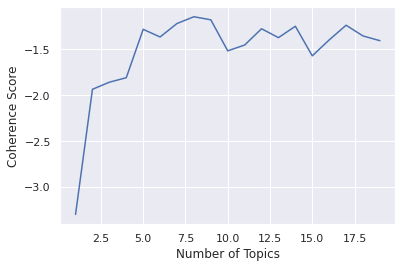

In [120]:
#Calculating the coherence score using C_umass to measure the degree of semantic similarity between high scoring words in each topic
topics = []
score = []
for i in range (1,20,1):   
  lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)   
  cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')   
  topics.append(i)
  score.append(cm.get_coherence())
plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

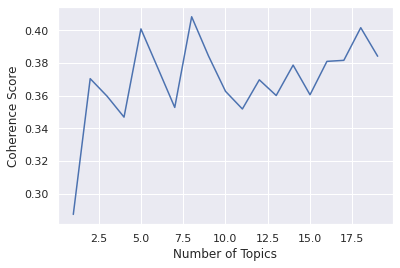

In [121]:
#Calculating the coherence score using C_v
topics = []
score = []
for i in range(1,20,1):  
  lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)   
  cm = CoherenceModel(model=lda_model, texts = news_df['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')   
  topics.append(i)
  score.append(cm.get_coherence())
plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [122]:
#Printing out the results
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=6, workers = 4, passes=100)
for top in lda_model.print_topics(10):
  print(top)

(0, '0.065*"energy" + 0.053*"finish" + 0.047*"start" + 0.044*"country" + 0.042*"way" + 0.042*"second" + 0.041*"lead" + 0.040*"go" + 0.040*"make" + 0.036*"di"')
(1, '0.104*"hold" + 0.080*"squad" + 0.079*"cup" + 0.063*"football" + 0.056*"match" + 0.055*"follow" + 0.035*"european" + 0.032*"season" + 0.031*"play" + 0.030*"united"')
(2, '0.078*"new" + 0.078*"people" + 0.050*"play" + 0.048*"work" + 0.036*"high" + 0.036*"football" + 0.036*"include" + 0.035*"old" + 0.029*"serie" + 0.029*"result"')
(3, '0.120*"match" + 0.078*"united" + 0.066*"set" + 0.059*"think" + 0.056*"lead" + 0.044*"break" + 0.043*"saturday" + 0.042*"point" + 0.038*"play" + 0.034*"states"')
(4, '0.151*"cup" + 0.044*"european" + 0.040*"play" + 0.035*"live" + 0.035*"friday" + 0.034*"lead" + 0.032*"football" + 0.030*"long" + 0.030*"hope" + 0.024*"player"')
(5, '0.342*"season" + 0.137*"come" + 0.051*"people" + 0.007*"super" + 0.007*"way" + 0.007*"old" + 0.007*"long" + 0.007*"give" + 0.007*"football" + 0.007*"go"')


In [123]:
#Distribution of topics in a document
lda_model[corpus][0]

[(4, 0.98413837)]

In [124]:
#Visualization of topics
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [125]:
#Creating a new column for topics
news_df['topic'] = [sorted(lda_model[corpus][text])[0][0] for text in range(len(news_df['Article']))]


In [126]:
#Counting frequency of every topic in a document
news_df.topic.value_counts()

0    10
2     3
4     2
1     2
3     2
Name: topic, dtype: int64

In [127]:
news_df.head()

,Date,Media,Title,Article,Summary,tokens,topic
0,1 week ago,Reuters,Former star Italy striker Vialli dies aged 58,"\n\n\n\n\n\n\n\n\n\n\n\n\n\nMILAN, Jan 6 (Reut...","Sampdoria, Juventus and Chelsea posted message...","[milan, jan, reuters, italy, striker, gianluca...",4
1,6 days ago,Forbes,Italy Mourns The Death Of Legendary Striker Gi...,"LONDON, ENGLAND - JULY 11: Gianluca Vialli, De...","LONDON, ENGLAND - JULY 11: Gianluca Vialli, De...","[london, england, july, gianluca, vialli, dele...",1
2,1 week ago,Al Jazeera,Italy’s football star Gianluca Vialli dies age...,"Vialli, who played with Sampdoria, Juventus an...","Vialli, who played with Sampdoria, Juventus an...","[vialli, play, sampdoria, juventus, chelsea, d...",4
3,6 days ago,ATP Tour,United Cup SF Preview: Will Berrettini Seal It...,Editor's Note: Taylor Fritz sealed the United ...,Editor's Note: Taylor Fritz sealed the United ...,"[editor, note, taylor, fritz, seal, united, st...",3
4,6 days ago,AP News,Italy to face US in United Cup final after Bro...,Italy to face US in United Cup final after Bro...,Italy to face US in United Cup final after Bro...,"[italy, face, united, cup, final, bronzetti, v...",3
